# DSBDAL Assignment 09 - Data Analytics 2



1.   Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.

2.   Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
ds = pd.read_csv('/content/drive/My Drive/DSBDL/Assignment9/data.csv')
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
ds.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
ds.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Age'>

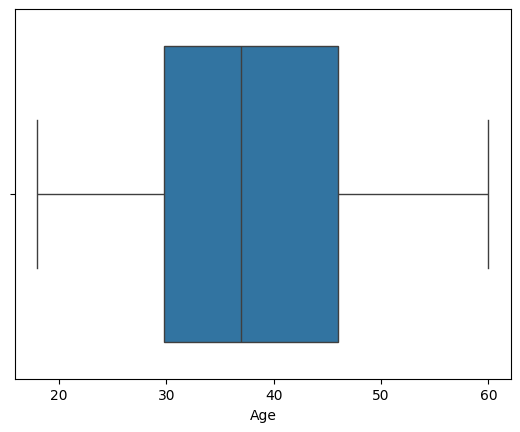

In [6]:
sns.boxplot(data = ds, x = 'Age')

<Axes: xlabel='EstimatedSalary'>

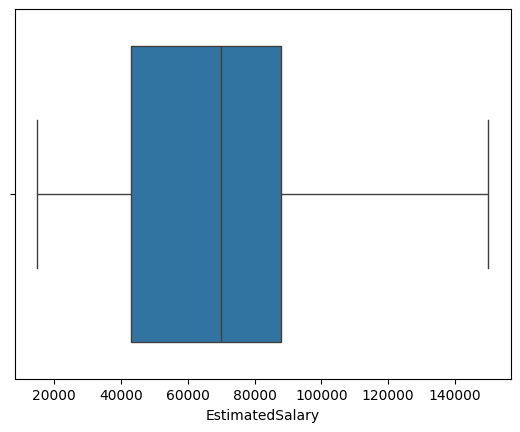

In [7]:
sns.boxplot(data = ds, x = 'EstimatedSalary')

In [8]:
ds['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

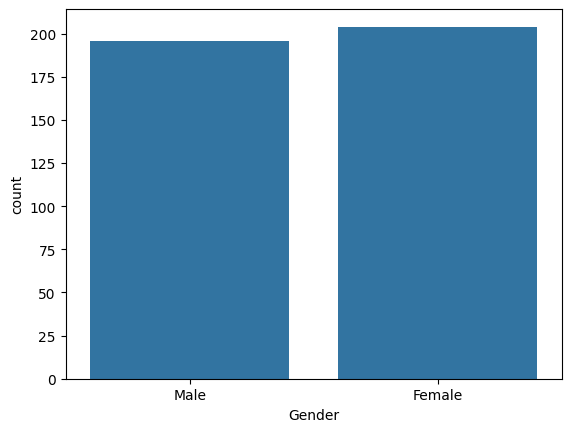

In [9]:
sns.countplot(data = ds, x = 'Gender')

In [10]:
ds['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

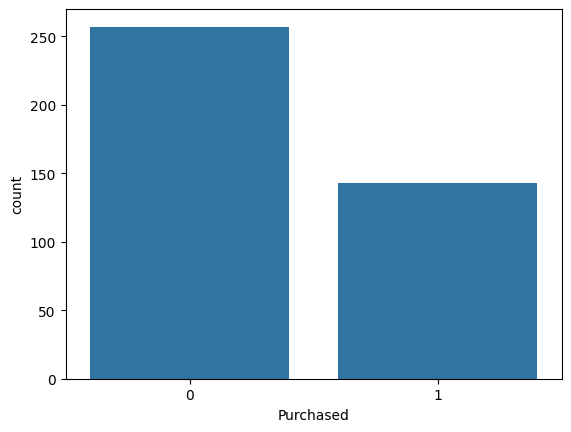

In [11]:
sns.countplot(data = ds, x = 'Purchased')

In [12]:
ds.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
ds.loc[ds['Gender'] == 'Male', 'Gender'] = 0
ds.loc[ds['Gender'] == 'Female', 'Gender'] = 1
ds = ds.astype({'Gender' : 'int'})
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [14]:
ds.drop(['User ID'], axis = 1, inplace = True)
ds

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [15]:
def min_max_normalization(col_name):
  ds[col_name] = (ds[col_name] - ds[col_name].min()) / (ds[col_name].max() - ds[col_name].min())

min_max_normalization('EstimatedSalary')
min_max_normalization('Age')
ds

,Gender,Age,EstimatedSalary,Purchased
0,0,0.023810,0.029630,0
1,0,0.404762,0.037037,0
2,1,0.190476,0.207407,0
3,1,0.214286,0.311111,0
4,0,0.023810,0.451852,0
...,...,...,...,...
395,1,0.666667,0.192593,1
396,0,0.785714,0.059259,1
397,1,0.761905,0.037037,1
398,0,0.428571,0.133333,0


In [16]:
ds[['Age', 'EstimatedSalary']].skew()
ds[['Age', 'EstimatedSalary']].kurtosis()

Age               -0.622513
EstimatedSalary   -0.405878
dtype: float64

In [17]:
# Check for transformation with near-zero skew and kurtosis

# Reciprocal transformation
print( ( 1 / (ds["Age"] + 1e-3) ).skew() )
print( ( 1 / (ds["Age"] + 1e-3) ).kurtosis() )

# square-root transformation
print( np.sqrt( ds[ "Age" ] ).skew() )
print( np.sqrt( ds[ "Age" ] ).kurtosis() )

# cube-root transformation
print( np.cbrt( ds[ "Age" ] ).skew() )
print( np.cbrt( ds[ "Age" ] ).kurtosis() )

# log-transformation
print( np.log( ds[ "Age" ] + 1e-6 ).skew() )
print( np.log( ds[ "Age" ] + 1e-6 ).kurtosis() )

8.772648855102862
75.54534474505262
-0.6431799328732787
0.36416628386911043
-1.31598202376335
2.9087199865782374
-6.314913080205095
46.98324920534226


In [18]:
from scipy.stats import boxcox , skew , kurtosis

# Box-cox (power-transform)
# https://en.wikipedia.org/wiki/Power_transform
output , lmbda = boxcox( ds[ "Age" ] + 1e-4 )
print( skew(output) )
print( kurtosis(output) )
print( lmbda )

-0.2385769089771854
-0.4060057246641384
0.6805870525685984


In [19]:
# Box-cox transform returns the smallest skew
# and kurtosis
ds["Age"] = boxcox( ds[ "Age" ] + 1e-4 )[0]
ds["EstimatedSalary"] = boxcox( ds[ "EstimatedSalary" ] + 1e-4 )[0]

In [20]:
ds[ [ "Age" , "EstimatedSalary" ] ].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,-0.625744,-0.764688
std,0.335984,0.398289
min,-1.466535,-1.736617
25%,-0.851804,-1.036507
50%,-0.612830,-0.701827
75%,-0.354216,-0.518077
max,0.000100,0.000100


In [21]:
from sklearn.model_selection import train_test_split

y = ds[ "Purchased" ].to_numpy()
X = ds[ [ "EstimatedSalary" , "Age" , "Gender" ] ].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 )

y_train = np.expand_dims( y_train , axis=1 )
y_test = np.expand_dims( y_test , axis=1 )

In [22]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(268, 3)
(132, 3)
(268, 1)
(132, 1)


In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit( X_train , y_train )
pred_y = clf.predict( X_test )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# positive -> pred_y = 0
# negative -> pred_y = 1

y_test = np.squeeze( y_test )
tp = ( (pred_y == 0) & (y_test == 0) ).sum()
fp = ( (pred_y == 0) & (y_test == 1) ).sum()
tn = ( (pred_y == 1) & (y_test == 1) ).sum()
fn = ( (pred_y == 1) & (y_test == 0) ).sum()

recall = tp / ( tp + fn )
precision = tp / ( tp + fp )
accuracy = ( tp + tn ) / ( tp + tn + fp + fn )
error = 1 - accuracy
f1 = ( 2 * recall * precision ) / ( precision + recall )

print( "Recall:" , recall )
print( "Precision:" , precision )
print( "Accuracy:" , accuracy )
print( "Error rate:" , error )
print( "F1:" , f1 )

Recall: 0.9156626506024096
Precision: 0.7676767676767676
Accuracy: 0.7727272727272727
Error rate: 0.2272727272727273
F1: 0.8351648351648352
